## This is an analysis of the Medical Cost dataset, by Prabhmeet Singh Deol.

### First we will import pandas, and use it to read the dataset. As well as do some method cleaning, and some data Wrangling. All of that has been Chained together, in the chunk , below for the purpose of ease to read , and debug.

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport as pf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# This part processes the data without any method chaining.

dataSet = (
		pd.read_csv('./../../data/processed/Processed_Medical_Data.csv')
	 	.loc[:,['bmi','charges']]
	 	.rename(columns={'charges':"Charges_USD"})
	 	.round({'bmi': 2, 'Charges_USD': 1})
		.astype({'bmi':float})

		)
#dataSet = dataSet[dataSet['bmi']<40]
## Adding more informative columns to our data Set.
def categorizeBmi(row):
	bmi = float(row['bmi'])
	if bmi < 18.59:
		return "Underweight"
	elif bmi < 24.99:
		return "Normal"
	elif bmi <29.99:
		return "Overweight"
	elif bmi >= 30.0:
		return "Obese"

dataSet['BMI_Category'] = dataSet.apply(categorizeBmi,axis='columns')



In [ ]:
dataSet

### Exploartory Research - Task 3

## This pandas Filter information, allows us to perform , and review several analytical tests , that might show some correlation. We can go through this , and see if our dataset , needs any more filtering.
	- Using this the categorize BMI was improved, as the previous version was leaving the dataset with several nan values.
	- Also some duplicate values were observed which were also removed(This change was made in the data processing file).
	- Also a decision was made to add a new column of BMI Category to help categorize the BMI's for easier understanding when producing plots.

Now we will explore the dataset Using plots.


In [ ]:
dataSet = pd.DataFrame(dataSet)
pf(dataSet).to_notebook_iframe()

## Pair plots, gives us several plots for all the different variables in out data Set. This part 

In [ ]:
## Exploratory Research
plot1 = sns.pairplot(dataSet,palette="virdis")

The only thing that could be concluded from this is that , there seems to be some linear relationship between bmi , and the amount of Medical charges.

## Now we will explore some statitistical data about our data Set.

## We will Demonstrate the total number of 

The following code gives us some statistical data to explore the previous found co-relation even more. And the mean Medical charge in the Obese groups is found to be the highest.

Although the mean difference between Normal and Overweight (Medical Charges) does not seem to be much.

In [ ]:
moneyStats=dataSet.groupby('BMI_Category')['Charges_USD'].agg(['mean','std','min', 'median','max']).round(1).T
moneyStats

The following code, may not be much useful but I was curious to see the percentage of US Population that is under the Obese Category.
	 - The plots produced below show us that a good chunk of the US population can be categorized as Obese, and that particular group has the highest mean Medical charges.

In [ ]:
countplot = sns.countplot(dataSet['BMI_Category'])
countplot.set(
	xlabel = "BMI Category",
	title="Count of Different BMI Categories in the data Set."
)

In [ ]:
sns.kdeplot(
   data=dataSet, x="bmi",fill=True
)


The following code Displays a short summary statistics of Medical Charges of different BMI categories of American Citizens.

In [ ]:
fig, ax =plt.subplots(2,2,figsize=(15,10))

boxplot = sns.boxplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][0]

)
boxplot.set(
	#yscale="log",
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Boxplot",
)
logboxplot = sns.boxplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][1],

)
logboxplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Boxplot",
)
barplot = sns.barplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][0],
)
barplot.set(
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Barplot",
)
logbarplot = sns.barplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][1],
)
logbarplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Barplot",
)
fig.tight_layout(h_pad=4,w_pad=10)
plt.suptitle("Different plots comapring mean Medical Charges of American Citizens",y=1.05)
fig.show()


In [ ]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
scatter1=sns.scatterplot(
	data=dataSet,
	x="bmi",
	y="Charges_USD",
	hue="BMI_Category",
	ax=ax[0],
	)
scatter1.set(
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Normal",
)
scatter1=sns.scatterplot(
	data=dataSet,
	x="bmi",
	y="Charges_USD",
	hue="BMI_Category",
	ax=ax[1]
	)
scatter1.set(
	yscale="log",
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Log Transformed",
)
plt.suptitle("Scatterplot Medical Charges of American Citizens",y=1)
fig.show()

In [ ]:
regplot = sns.regplot(
	data = dataSet,
	x="bmi",
	y="Charges_USD",
)
regplot.set(
	yscale="log",
	xlabel="BMI ",
	ylabel="Medical Charges in USD",
	title="BMI vs Medical Charges of U.S. Citizens",
)

From All the above graphs we might , assume that the obese groups have higher medical bills than other groups. Although this might be biased since we have a higher count of Obese people in our population. Therefore we will now try to sample equal observations , from each of out categories.

In [ ]:
randomSample = dataSet.groupby('BMI_Category').sample(n=20)
randomSample

In [171]:
randomSample.groupby('BMI_Category')['Charges_USD'].agg(['mean','std','min', 'median','max']).round(1).T

BMI_Category,Normal,Obese,Overweight,Underweight
mean,10467.3,19608.7,8759.4,8608.3
std,7681.5,14562.3,8327.5,7785.5
min,2396.1,3591.5,1977.8,1621.3
median,8299.7,12343.2,6527.0,5878.5
max,27037.9,48173.4,38245.6,32734.2


## The following plots show that The Obese group still has the highest median Medcial Charges , although we do not see a linear trend from underweight to obese. i.e The Overweight did not show evidence of having a higher mean that Normal people.

<ipython-input-172-17ebf572cb85>:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


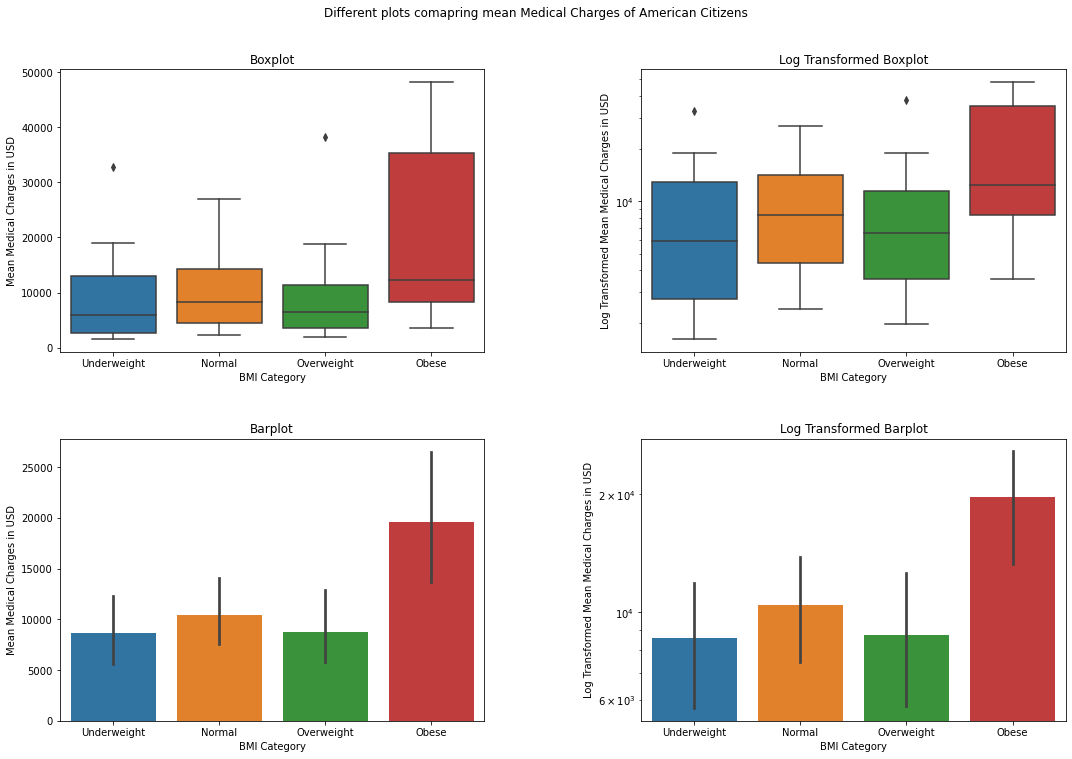

In [172]:
fig, ax =plt.subplots(2,2,figsize=(15,10))

boxplot = sns.boxplot(
	data = randomSample,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][0]

)
boxplot.set(
	#yscale="log",
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Boxplot",
)
logboxplot = sns.boxplot(
	data = randomSample,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][1],

)
logboxplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Boxplot",
)
barplot = sns.barplot(
	data = randomSample,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][0],
)
barplot.set(
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Barplot",
)
logbarplot = sns.barplot(
	data = randomSample,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][1],
)
logbarplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Barplot",
)
fig.tight_layout(h_pad=4,w_pad=10)
plt.suptitle("Different plots comapring mean Medical Charges of American Citizens",y=1.05)
fig.show()


Also the scatter plot before fail to show any linear co-relation between bmi and Medical Charges.

<ipython-input-173-c6d20a2a79f9>:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


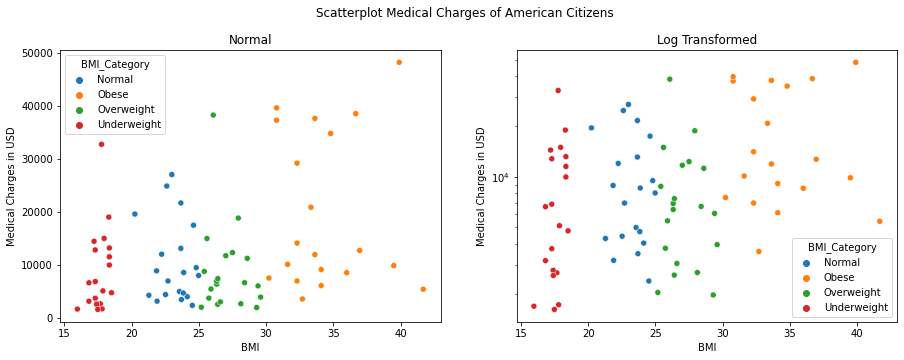

In [173]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
scatter1=sns.scatterplot(
	data=randomSample,
	x="bmi",
	y="Charges_USD",
	hue="BMI_Category",
	ax=ax[0],
	)
scatter1.set(
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Normal",
)
scatter1=sns.scatterplot(
	data=randomSample,
	x="bmi",
	y="Charges_USD",
	hue="BMI_Category",
	ax=ax[1]
	)
scatter1.set(
	yscale="log",
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Log Transformed",
)
plt.suptitle("Scatterplot Medical Charges of American Citizens",y=1)
fig.show()